In [49]:
from subprocess import Popen, PIPE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(font_scale=1.3, style='darkgrid', palette='Set2')

In [58]:
Ns = [2**i for i in range(4, 20)]

n_list = []

for n in Ns:
    n_list += list(range(n, n + math.ceil(2*math.log(n))))

data = []

for n in n_list:
    process = Popen(['./a.out', f'{n}', '2'], stdout=PIPE, stderr=PIPE)
    stdout, stderr = process.communicate()
    nums = stdout.decode("utf-8").split(' ')
    data.append((n, int(nums[0]), int(nums[1])))
    
df = pd.DataFrame(data, columns=('n', 'time', 'is prime'))

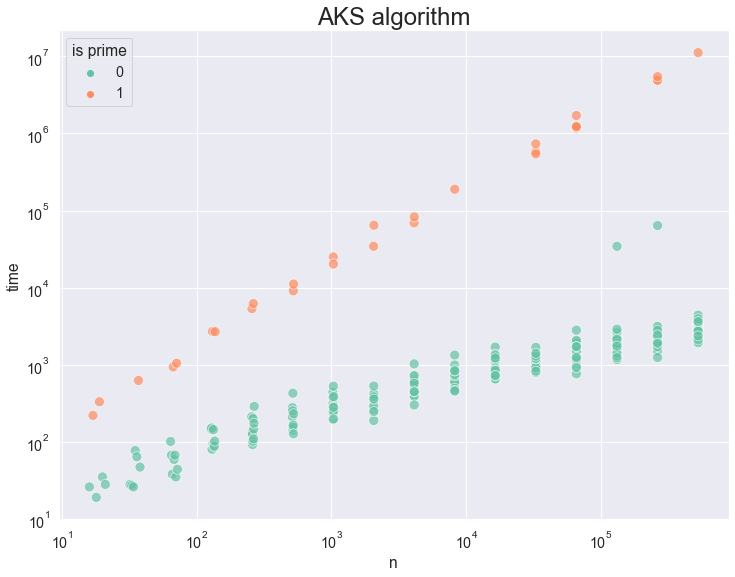

In [75]:
plt.figure(figsize=(12, 9))

sns.scatterplot(x = df['n'], y = df['time'], 
                hue=df['is prime'], alpha=0.7, s=100)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('n')
plt.ylabel('time')

plt.title('AKS algorithm', fontdict = {'fontsize' : 24})

plt.savefig('image')

plt.show()